<a href="https://colab.research.google.com/github/PonchaCape/DS-school-homework/blob/main/HW_lessons_9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

In [18]:
import numpy as np
import pandas as pd

In [2]:
def f(x):
    return x[0]**2+5*(x[1]**2)
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

In [3]:
def grad_descent_const_step(x = np.array([0, 0]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [4]:
def grad_descent_step_splitting(x = np.array([120,111]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x


In [ ]:
grad_descent_const_step(x=np.array([100,100]), alpha=0.1)

Градиентный спуст с постоянным шагом выполнил 40 шагов
Точка с координатами х1 = 0.013292279957849165, x2 = 0.0


array([0.01329228, 0.        ])

In [ ]:
grad_descent_step_splitting(x=np.array([150,200]), ksi=0.1)

Градиентный спуст с дроблением шага выполнил 19 шагов
Выполнено 32 итераций дробления шага
Точка с координатами х1 = 0.002832234172923843, x2 = -0.00018494508027862874


array([ 0.00283223, -0.00018495])

### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

### Задание 4.
Случайная величина X задана следующей функцией распределения:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 4 и 5 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. Однако 2ой пункт задания (на нахождение производной) должен быть расписан!

In [6]:
import seaborn as sns

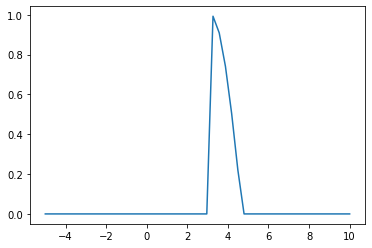

In [88]:
Task4_X = np.linspace(-5,10,num=50)
Task4_Y = []
for num in Task4_X:
  if num <= np.pi:
    Task4_Y.append(0)
  elif num <= 1.5*np.pi:
    Task4_Y.append(-1*np.cos(num))
  elif num > 1.5*np.pi:
    Task4_Y.append(0)
sns.lineplot(x=Task4_X, y=Task4_Y)

Плотность вероятности f(x) будет равна
$$
f(x)=F'(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
\sin x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

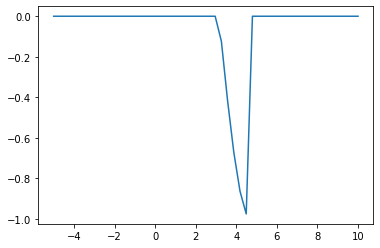

In [90]:
P = []
for num in Task4_X:
  if num <= np.pi:
    P.append(0)
  elif num <= 1.5*np.pi:
    P.append(np.sin(num))
  elif num > 1.5*np.pi:
    P.append(0)
sns.lineplot(x=Task4_X, y=P)

Определить вероятность попадания случайной величины X в интервал [π,5π/4]

$\int_π^{(5 π)/4} -cos(x) dx = \frac{1}{\sqrt2}≈0.70711$

In [94]:
#Найти дисперсию случайной величины
np.array(Task4_Y).var()

0.048736352465115845

In [95]:
#Найти мат.ожидание
np.array(Task4_Y).mean()

0.06735526468559125

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


Ответ на задание 5.
1. Да, заданная функция является непрерывной.
2. Плотность вероятности случайной величины  $$f(x)=F'(x)=\left\{\begin{array}{c}0, x \leq 1 \\ 1,1<x \leq 2 \\ 0, x>2\end{array}\right.$$

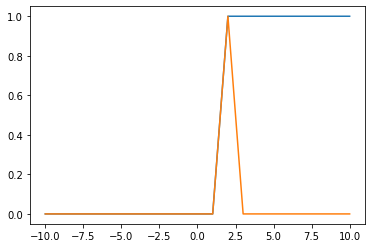

In [59]:
X = [i for i in range(-10,11)]
F_X = []
f_x = []
for num in X:
  if num <= 1:
    F_X.append(0)
    f_x.append(0)
  elif num <= 2:
    F_X.append(num-1)
    f_x.append(1)
  elif num > 2:
    F_X.append(1)
    f_x.append(0)
sns.lineplot(x=X, y=F_X)
sns.lineplot(x=X,y=f_x)


### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

В нашей выборке всего 10100 объектов с двумя классами, один из которых содержит 100 элементов, а второй 10000. Если модель отнесла к первому классу 120 примеров, 90 из которых верны, а 30 ошибочны, то из этого следует, что есть ещё 10 примеров в данных, которые модель упустила, отнеся их ко второму классу.
90 верных значений мы будем рассматривать как True positive, 30 значений как False Positive, 10 как False negative

${\displaystyle {\text{Precision}}={\frac {tp}{tp+fp}}\,}=\frac{90}{90+30}=\frac{3}{4}=0.75$


${\displaystyle {\text{Recall}}={\frac {tp}{tp+fn}}\,}=\frac{90}{90+10}=0.9$

${\displaystyle F=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}=\frac{2*0.75*0.9}{0.75+0.9}=\frac{1.35}{1.65}=0.8182$